# z検定の検出力関数
## データ発生過程
$$
y_i = \beta x_i + u_i~~\forall i
$$
## 誤差項についての仮定
誤差項 $u$ について以下の4つの仮定を課す．
$$
\begin{align*}
&\text{E}(u_i) = 0~~\forall i, \\
&\text{E}(u_i^2) = \sigma_u^2~~\forall i, \\
&\text{E}(u_iu_j) = 0~~(i \neq j), \\
&u_i\overset{i.i.d}{\sim} N(0, \sigma_u^2)~~\forall i.
\end{align*}
$$
## 定数項なし単純回帰モデル
$$
y_i = \beta x_i + u_i,~~~~ i = 1,\ldots,n
$$
最小二乗推定量 $\hat{\beta}$ は
$$
\hat{\beta} = \frac{\sum_i x_iy_i}{\sum_i x_i^2}
$$
で与えられる．帰無仮説 $H_0 : \beta_0 = \beta^*$ および対立仮説 $H_1 : \beta_0 \neq \beta^*$ に対するz検定統計量は，
$$
\hat{z_\beta} = \frac{\hat{\beta} - \beta^*}{se_\beta}~~
\text{where}~~se_\beta = \sqrt{\frac{\sigma_u^2}{\sum_ix_i^2}}
$$
で与えられる．
## 検出力関数
$\Phi(\cdot), \phi(\cdot)$ をそれぞれ，標準正規分布の分布関数と確率密度関数であるとする．
$$
\begin{align*}
\phi(x) &= \frac{1}{\sqrt{2\pi}}\exp{\left(-\frac{x^2}{2}\right)}, \\
\Phi(x)' &= \phi(x)
\end{align*}
$$
有意水準 $a \in (0, 1)$ のz検定の臨界値 $r_a$ は，以下の標準正規分布の上側 $100(a/2)\%$ 点で与えられ，
$$
r_a = \Phi^{-1} \left(1-\frac{a}{2}\right),
$$
帰無仮説の棄却確率は次式で与えられる．
$$
\Pr(|\hat{z_\beta}| > r_a) = 1 - \Phi\left(r_a-\frac{\varepsilon}{se_\beta}\right) + \Phi\left(-r_a-\frac{\varepsilon}{se_\beta}\right),~~~~\text{where}~~\varepsilon \equiv \beta_0 - \beta^*
$$
この棄却確率を $se_\beta, a$ を所与とした $\varepsilon$ の関数とみなして，検出力関数 $f$ を定義する．
$$
f(\varepsilon ; se_\beta, a) = 1 - \Phi\left(r_a-\frac{\varepsilon}{se_\beta}\right) + \Phi\left(-r_a-\frac{\varepsilon}{se_\beta}\right)
$$
この検出力関数を $se_\beta=0.2,~a=0.05~(r_a = 1.96)$ と定め， $|\varepsilon| < 1$ の範囲内で図示する．

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

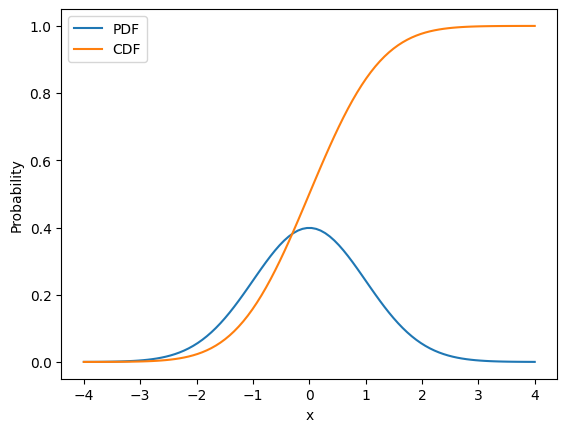

In [8]:
## standard normal distribution
x = np.linspace(-4, 4, 100)
y_pdf = norm.pdf(x, loc=0, scale=1) # probability density function
y_cdf = norm.cdf(x, loc=0, scale=1) # cumulative distribution function

# plot both pdf and cdf
fig, ax = plt.subplots()
ax.plot(x, y_pdf, label="PDF")
ax.plot(x, y_cdf, label="CDF")
ax.set_xlabel("x")
ax.set_ylabel("Probability")
ax.legend();

検出力関数
$$
f(\varepsilon ; se_\beta, a) = 1 - \Phi\left(r_a-\frac{\varepsilon}{se_\beta}\right) + \Phi\left(-r_a-\frac{\varepsilon}{se_\beta}\right),\\
\text{where}~se_\beta=0.2,~r_a = 1.96,~|\varepsilon| < 1
$$
を Python で実装する．

In [9]:
def power_function(epsion, se, r):
    x1 = r - epsilon / se
    x2 = -r - epsilon / se
    prob = 1 - norm.cdf(x1, loc=0, scale=1) + norm.cdf(x2, loc=0, scale=1)
    return prob

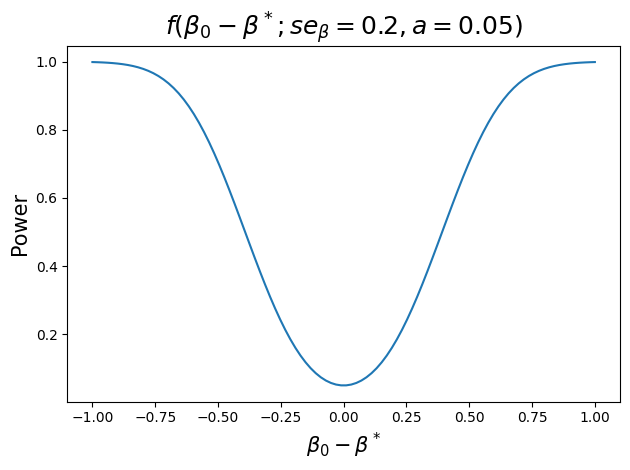

In [10]:
## plot the power function
# fixed values
r = 1.96
se = 0.2
epsilon = np.linspace(-1, 1, 100)

fig, ax = plt.subplots()
ax.plot(epsilon, power_function(epsilon, se, r))
ax.set_title(r"$f(\beta_0 - \beta^*; se_\beta=0.2, a=0.05)$", size=18)
ax.set_xlabel(r"$\beta_0 - \beta^*$", size=15)
ax.set_ylabel("Power", size=15)
fig.tight_layout()

# save the generated figure
plt.savefig("Figure/ztest_power_function1.png")

標準誤差を $se_\beta=0.2$ で固定し，有意水準 $a \in \{0.01, 0.05, 0.10\}$ について検出力関数 $f(\beta_0 - \beta^*; se_\beta, a)$ を図示する．有意水準ごとの比較を容易にするために，横軸の範囲は $(-1,1)$，縦軸の範囲は $(0, 1)$ で固定し，一つの図の中にすべての場合の曲線を描画する．

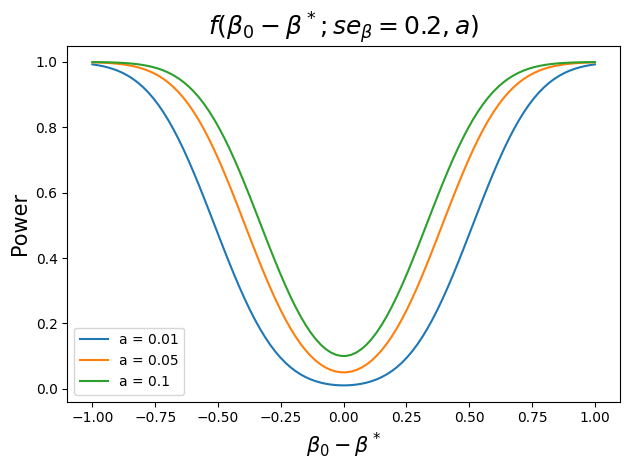

In [11]:
# map between the significance level and its critical value
level_critical_map = {0.01: 2.567, 0.05: 1.96, 0.1: 1.645}
# fixed values
se = 0.2
epsilon = np.linspace(-1, 1, 100)

fig, ax = plt.subplots()

for level, r in level_critical_map.items():
    ax.plot(epsilon, power_function(epsilon, se, r), label=f"a = {level}")
ax.set_title(r"$f(\beta_0 - \beta^*; se_\beta=0.2, a)$", size=18)
ax.set_xlabel(r"$\beta_0 - \beta^*$", size=15)
ax.set_ylabel("Power", size=15)
ax.legend()
fig.tight_layout()

# save the generated figure
plt.savefig("Figure/ztest_power_function2.png")

有意水準を $a=0.05$ で固定し，標準誤差 $se_\beta \in \{0.1, 0.2, 0.3\}$ について検出力関数 $f(\beta_0 - \beta^*; se_\beta, a)$ を図示する．有意水準ごとの比較を容易にするために，横軸の範囲は $(-1,1)$，縦軸の範囲は $(0, 1)$ で固定し，一つの図の中にすべての場合の曲線を描画する．

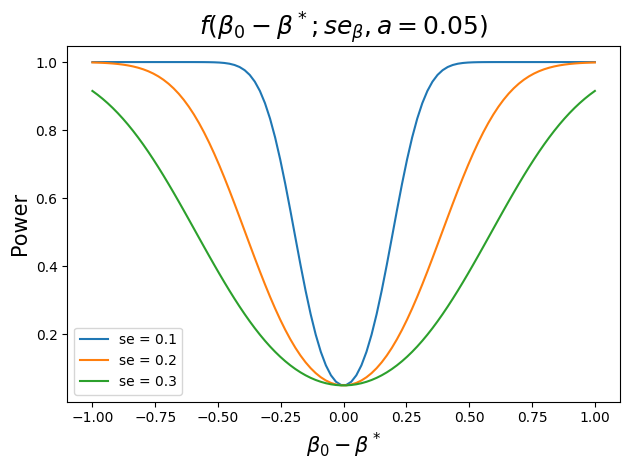

In [12]:
# standard error
se_lst = [0.1, 0.2, 0.3]
# fixed values
r = 1.96
epsilon = np.linspace(-1, 1, 100)

fig, ax = plt.subplots()

for se in se_lst:
    ax.plot(epsilon, power_function(epsilon, se, r), label=f"se = {se}")
ax.set_title(r"$f(\beta_0 - \beta^*; se_\beta, a=0.05)$", size=18)
ax.set_xlabel(r"$\beta_0 - \beta^*$", size=15)
ax.set_ylabel("Power", size=15)
ax.legend()
fig.tight_layout()

# save the generated figure
plt.savefig("Figure/ztest_power_function3.png")